# Pymaceuticals Inc.
---

### Analysis

- From the data given, there were 249 mice with SCC tumors in the study. Upon analyzing the data, a duplicate mice data with Mouse ID = g989(13 records) was observed thereby confirming 248 unique mice were subjected to treatment with various drug regimens. 
Off the various drug treatments, Capomulin was the drug that was maximum tested on the mice - 230 recorded timepoint while Propriva was the least dested drug 148 recorded timepoints. Male to female ratio was 51% : 49%.
- In the data provided,it appears that only the Infubinol regimen has a potential outlier with a tumor volume of 36.321346. The other regimens (Capomulin, Ramicane, and Ceftamin) do not have any potential outliers based on the given data.
-The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The correlation between the mouse weight and tumor volume is 0.84, which indicates that if an increase in mouse weight is observed , it is very liekly that the tumor volume will increase.
- The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
- From the selected treatments Capomulin and Ramicane reduces the size of tumor better than other drugs.
 

In [299]:
# Importing the required dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress,pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how = "outer")

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [300]:
# Checking the number of mice 
num_mice = data_df["Mouse ID"].nunique()
num_mice

249

In [352]:
# Our data uniquely identified by Mouse ID and Timepoint
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = data_df.loc[data_df.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_data

array(['g989'], dtype=object)

In [305]:
# Getting all the data for the duplicate mouse ID. 
duplicated_data = data_df.loc[data_df["Mouse ID"]== "g989"]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [306]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.loc[data_df['Mouse ID']!= "g989"]
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [309]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
organized_df = clean_df.groupby("Drug Regimen")
tumor_mean = organized_df["Tumor Volume (mm3)"].mean()
tumor_median = organized_df["Tumor Volume (mm3)"].median()
tumor_variance = organized_df["Tumor Volume (mm3)"].var()
tumor_stddev = organized_df["Tumor Volume (mm3)"].std()
tumor_stderr = organized_df["Tumor Volume (mm3)"].sem(ddof = 1)

tumor_study_df = pd.DataFrame({
               "Mean Tumor Volume" : tumor_mean,
               "Median Tumor Volume" : tumor_median,
               "Tumor Volume Variance": tumor_variance,
               "Tumor Volume Std. Dev.": tumor_stddev,
               "Tumor Volume Std. Err." : tumor_stderr  
})
tumor_study_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [311]:
# Using the aggregation method, generating the statistics table of mean, median, variance, standard deviation, standard error
summary = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

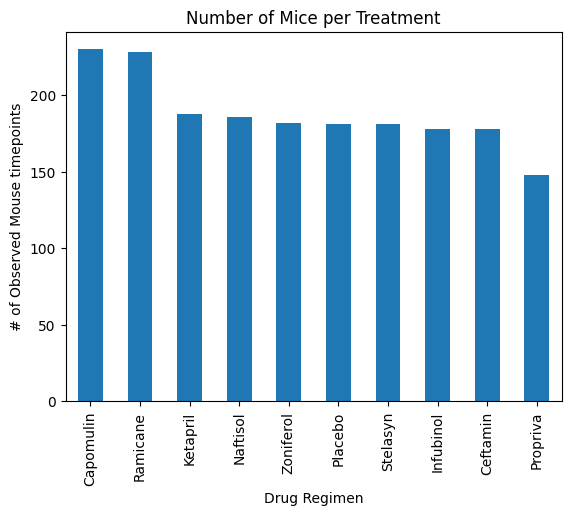

In [312]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df['Drug Regimen'].value_counts()
x_axis = mice_count.index.values
plot_pandas = mice_count.plot.bar('b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse timepoints")
plt.title("Number of Mice per Treatment")

In [359]:
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

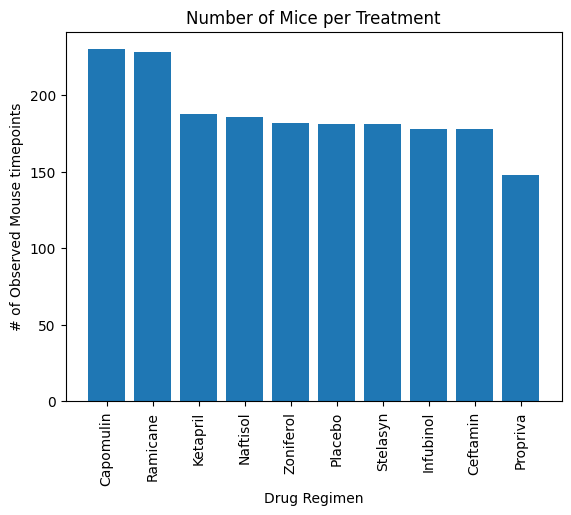

In [313]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis,mice_count, align = "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse timepoints")
plt.title("Number of Mice per Treatment")
plt.show()

<Axes: title={'center': 'Female vs. Male Mice'}, ylabel='Sex'>

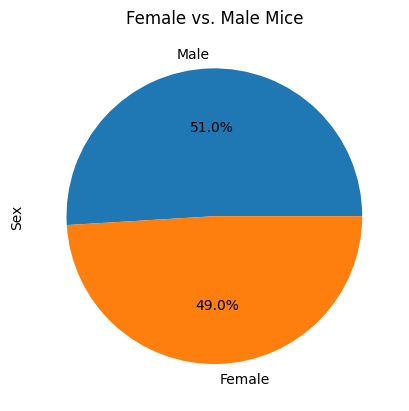

In [362]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas
values = clean_df["Sex"].value_counts()
values.plot.pie(autopct='%1.1f%%',ylabel = "Sex",title = "Female vs. Male Mice")

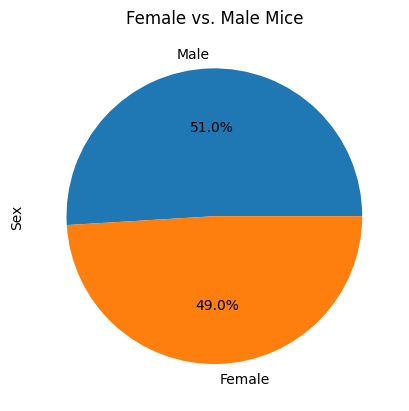

In [354]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = clean_df["Sex"].value_counts()
labels = values.index
labels
plt.pie(values, autopct = "%2.1f%%", labels = labels)
plt.ylabel("Sex")
plt.title("Female vs. Male Mice")
plt.show()

# Quartiles, Outliers and Boxplots
*Calculate the final tumor volume of each mouse across four of the treatment regimens: 

*Capomulin, Ramicane, Infubinol, and Ceftamin 

*Start by getting the last (greatest) timepoint for each mouse

*Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [318]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df  = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

In [319]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
capomulin_max = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_max)
capomulin_vol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_vol, clean_df, how = "left", on =["Mouse ID","Timepoint"])

In [320]:
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

# Capomulin quartiles and IQR
quartiles = capomulin_merge['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqrc = upperq-lowerq

# Determine outliers using upper and lower bounds
lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 15.577752179999997
The median of Capomulin tumors: 38.1251644 
Values below 9.010728570000001 could be outliers.
Values above 63.525848569999994 could be outliers.


In [355]:
#Ramicane

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

# Ramicane quartiles and IQR
quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [322]:
# Infubinol

infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [323]:
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

#  Infubinol quartiles and IQR
quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [324]:
# Ceftamin

ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [325]:
# Ceftamin quartiles and IQR
#
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin tumors is: {upperq}")
print(f"The interquartile range of Ceftamin tumors is: {iqr}")
print(f"The the median of Ceftamin tumors is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors is: 48.72207785
The upper quartile of Ceftamin tumors is: 64.29983003
The interquartile range of Ceftamin tumors is: 15.577752179999997
The the median of Ceftamin tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


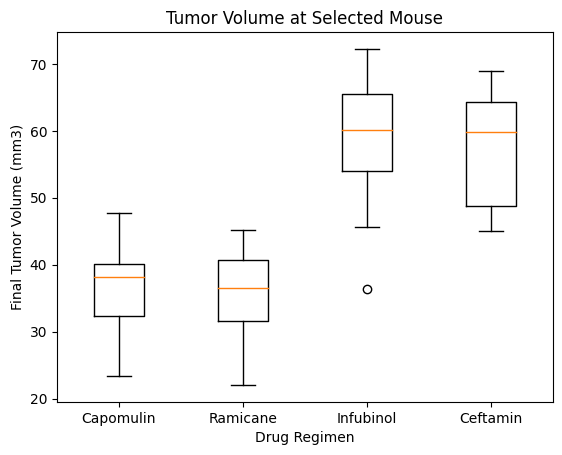

In [356]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

# Recalculated: Quartiles, Outliers and Boxplots using for loop 

   * Create empty list to fill with tumor vol data (for plotting)
   * Calculate the IQR and quantitatively determine if there are any potential outliers. 
   * Locate the rows which contain mice on each drug and get the tumor volumes add subset 
   * Determine outliers using upper and lower bounds

Potential outliers for the Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)  

Potential outliers for the Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)  

Potential outliers for the Infubinol is 5    36.321346
Name: Tumor Volume (mm3), dtype: float64  

Potential outliers for the Ceftamin is Series([], Name: Tumor Volume (mm3), dtype: float64)  



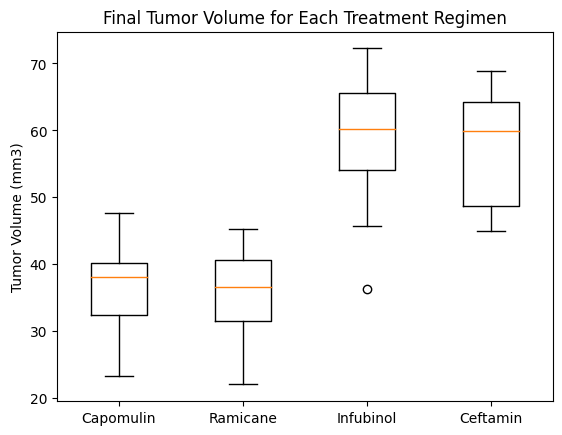

In [360]:
# Select the specific treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store the final tumor volumes for each regimen
final_tumor_volumes = []

# Iterate over the treatment regimens
for regimen in treatment_regimens:
    # Filter the DataFrame for the current regimen
    regimen_df = clean_df.loc[clean_df['Drug Regimen'] == regimen]
    
    # Get the last (greatest) timepoint for each mouse
    last_timepoints = regimen_df.groupby('Mouse ID')['Timepoint'].max()
    
    # Merge the last timepoints with the original DataFrame to get the tumor volume at the last timepoint
    merged_df = pd.merge(regimen_df, last_timepoints, on=['Mouse ID', 'Timepoint'])
    
    # Append the final tumor volumes for the current regimen to the list
    final_tumor_volumes.append(merged_df['Tumor Volume (mm3)'])
    
    # Calculate quartiles and identify outliers
    quartiles = merged_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = merged_df.loc[(merged_df['Tumor Volume (mm3)'] < lower_bound) | (merged_df['Tumor Volume (mm3)'] > upper_bound)]
    outliers_vol = outliers['Tumor Volume (mm3)']
    print(f"Potential outliers for the {regimen} is {outliers_vol}  \n")

# Create a boxplot for all regimens together
plt.boxplot(final_tumor_volumes, labels=treatment_regimens)
plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

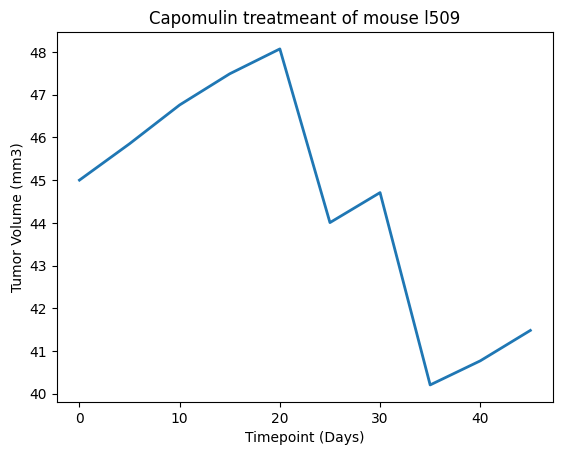

In [378]:
# Generated a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

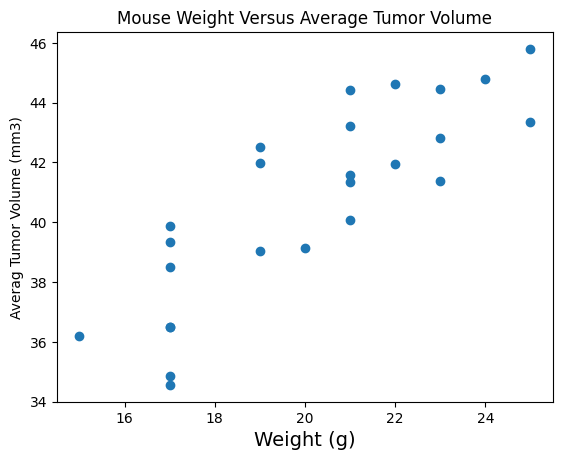

In [358]:
# Generated a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
grouped_df = capomulin_df.groupby("Mouse ID").agg(avg_tumor_volume=("Tumor Volume (mm3)", "mean"), mouse_weight=("Weight (g)", "mean"))
plt.scatter(grouped_df['mouse_weight'], grouped_df['avg_tumor_volume'])

plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.842


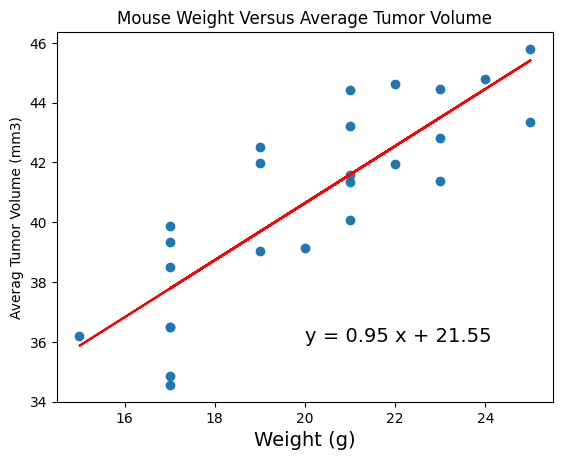

In [373]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation_coef, p_value = pearsonr(grouped_df['mouse_weight'], grouped_df['avg_tumor_volume'])
grouped_df = capomulin_df.groupby("Mouse ID").agg(avg_tumor_volume=("Tumor Volume (mm3)", "mean"), mouse_weight=("Weight (g)", "mean"))

# plotting scatter plot and setting title, labels and performing regression analysis 
plt.scatter(grouped_df['mouse_weight'], grouped_df['avg_tumor_volume'])
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
regression_result = linregress(grouped_df['mouse_weight'], grouped_df['avg_tumor_volume'])
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(20,36), fontsize=14)
slope = regression_result.slope
intercept = regression_result.intercept
rvalue = regression_result.rvalue
y = slope * grouped_df['mouse_weight']+ intercept
plt.plot(grouped_df['mouse_weight'],y,"-", color ="red")
print(f"The correlation between both factors is {round(correlation_coef,2)}")
print(f"The r-squared is: {round(rvalue,3)}")
